In [43]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results

## Lijstje van analysis methodes

- Summarizing values such as mean, var, max, min
- Boxplots
- Feature scoring
- Scenario analysis
- Sobol indices

### Run 10 points 10 scenarios

In [3]:
results = load_results('../results/first_run_10points_10scenarios.gz')

In [4]:
experiments, outcomes = results

In [10]:
outcomes

{'num_of_nodes': array([3201, 3042, 3067, 3107, 2917, 2891, 2801, 2761, 2931, 2871],
       dtype=int64),
 'num_of_edges': array([3384, 3206, 3231, 3276, 3088, 3055, 2970, 2922, 3094, 3040],
       dtype=int64),
 'continuity_mean': array([58.2617284 , 57.1308642 , 56.02469136, 57.80740741, 54.21481481,
        56.12839506, 52.84444444, 54.40740741, 56.48888889, 58.12098765]),
 'continuity_vars': array([609.95618961, 566.97793629, 558.16729157, 583.10364883,
        448.46002743, 524.9069715 , 425.47950617, 452.52290809,
        553.12888889, 606.14091754]),
 'connectivity_mean': array([44., 44., 44., 44., 44., 44., 44., 44., 44., 44.]),
 'connectivity_vars': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'degree_centrality_mean': array([0.00552105, 0.00575391, 0.00571413, 0.00564444, 0.00594314,
        0.00604179, 0.00624381, 0.0063747 , 0.00592154, 0.00606088]),
 'degree_centrality_var': array([1.27276295e-06, 1.40002946e-06, 1.34842907e-06, 1.32354731e-06,
        1.46780042e-06,

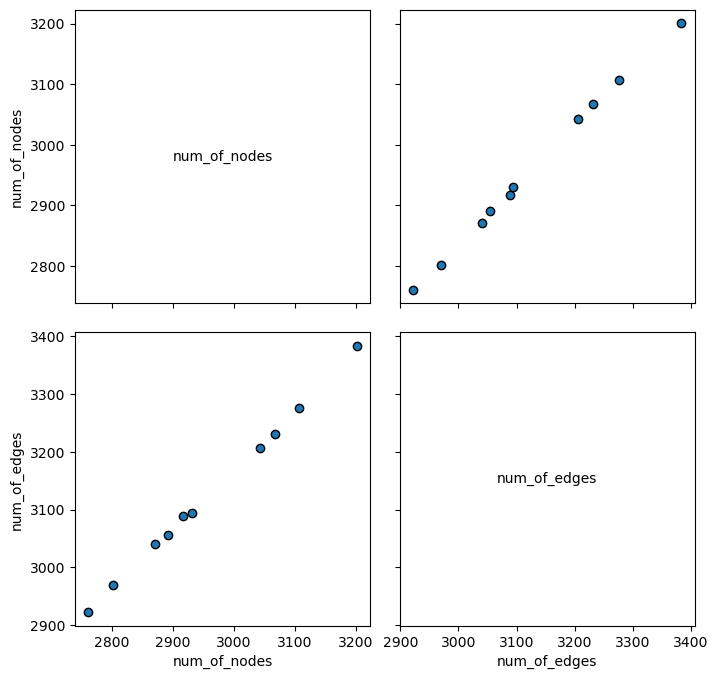

In [17]:
fig, axes = pairs_plotting.pairs_scatter(experiments, {k: outcomes[k] for k in ('num_of_nodes', 'num_of_edges')}, legend=False)
fig.set_size_inches(8, 8)

<AxesSubplot:ylabel='0'>

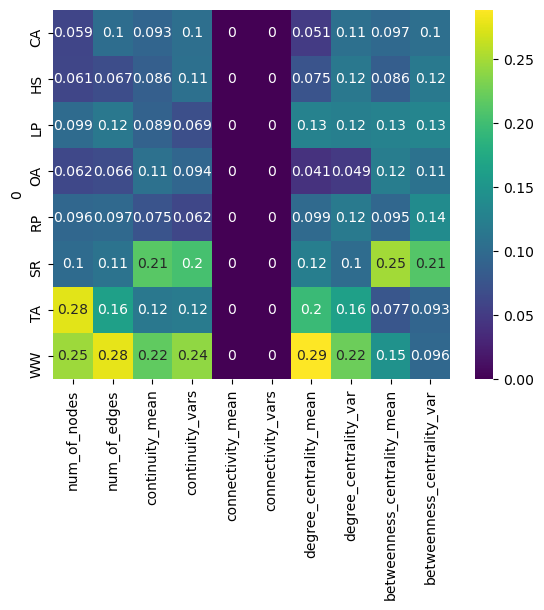

In [22]:


fs = feature_scoring.get_feature_scores_all(experiments, outcomes)
sns.heatmap(fs, cmap="viridis", annot=True)

# Run 10 points, 64 scenarios

In [7]:
experiments, outcomes =  load_results('../results/first_run_10points_64scenarios.gz')

In [11]:
outcomes.keys()

dict_keys(['num_of_nodes', 'num_of_edges', 'continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'degree_centrality_mean', 'degree_centrality_var', 'betweenness_centrality_mean', 'betweenness_centrality_var'])

## Boxplot van outcomes

In [50]:
outcomes_list = []
for key in outcomes.keys():
    outcomes_list.append(outcomes[key])

[Text(1, 0, 'num_of_nodes'), Text(2, 0, 'num_of_edges')]

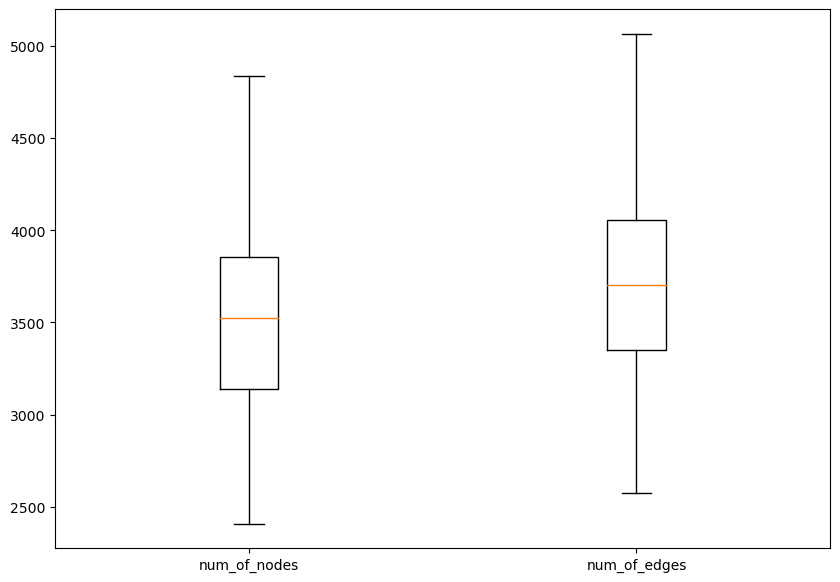

In [56]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(outcomes_list[:2])

ax.set_xticklabels(['num_of_nodes', 'num_of_edges'])

[Text(1, 0, 'connectivity_mean')]

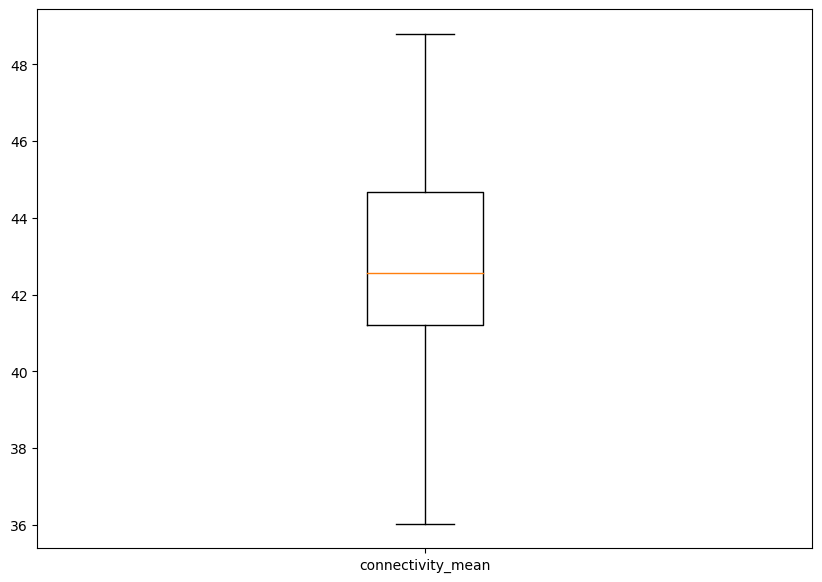

In [66]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(outcomes_list[4:5])

ax.set_xticklabels(list(outcomes.keys())[4:5])

## Statistical values of outcomes

In [67]:
stats_df = pd.DataFrame()
for key in list(outcomes.keys()):
    df = pd.DataFrame(outcomes[key])
    stats_df[key] = df.describe()

In [68]:
stats_df

,num_of_nodes,num_of_edges,continuity_mean,continuity_vars,connectivity_mean,connectivity_vars,degree_centrality_mean,degree_centrality_var,betweenness_centrality_mean,betweenness_centrality_var
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01,64.000000,64.000000
mean,3516.265625,3708.562500,57.486408,487.950787,42.720200,94.201296,0.006191,1.440844e-06,0.134241,0.016650
std,543.438121,554.498569,6.106499,159.436839,2.732878,38.706115,0.001116,6.927145e-07,0.010444,0.002206
min,2410.000000,2575.000000,45.218000,209.321196,36.031111,0.160000,0.003872,4.618220e-07,0.108304,0.011444
25%,3139.250000,3349.250000,52.948722,359.070169,41.212000,60.168867,0.005358,9.273182e-07,0.125998,0.015157
50%,3523.500000,3705.500000,57.421000,464.942264,42.560000,101.318379,0.006026,1.206717e-06,0.134537,0.016593
75%,3856.500000,4056.250000,61.633000,598.120281,44.682000,124.020872,0.006855,1.792886e-06,0.141420,0.018196
max,4833.000000,5065.000000,76.933333,890.921136,48.800000,160.079506,0.009153,3.666916e-06,0.165091,0.021776


## Feature scoring

<AxesSubplot:ylabel='0'>

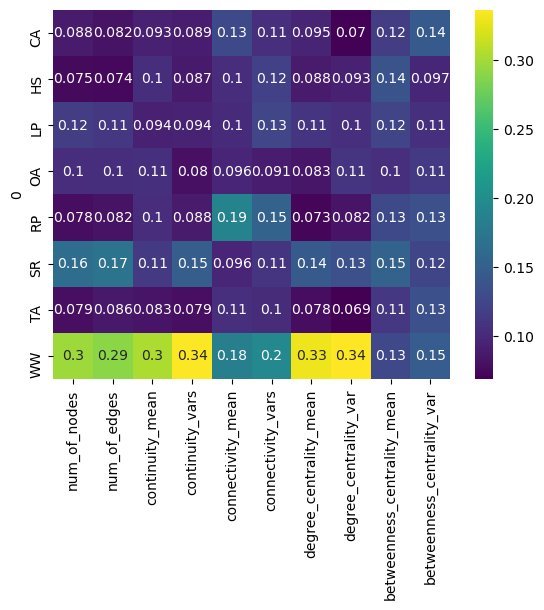

In [9]:
fs = feature_scoring.get_feature_scores_all(experiments, outcomes)
sns.heatmap(fs, cmap="viridis", annot=True)

In [16]:
df = pd.DataFrame(outcomes['num_of_nodes'])

In [17]:
df.describe()

,0
count,64.000000
mean,3516.265625
std,543.438121
min,2410.000000
25%,3139.250000
50%,3523.500000
75%,3856.500000
max,4833.000000


## Scenario analysis

In [69]:
x = experiments
y = outcomes["num_of_nodes"] > 3856
prim_alg = prim.Prim(x, y, threshold=0.6)
box1 = prim_alg.find_box()

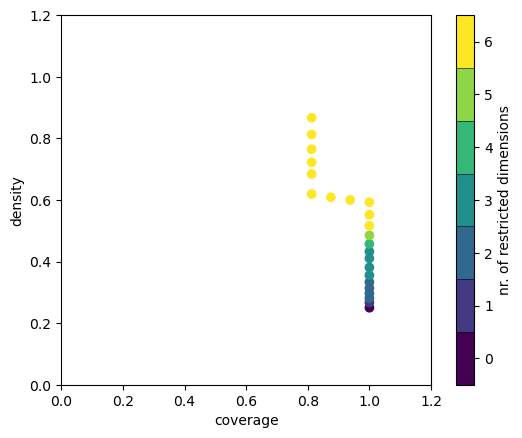

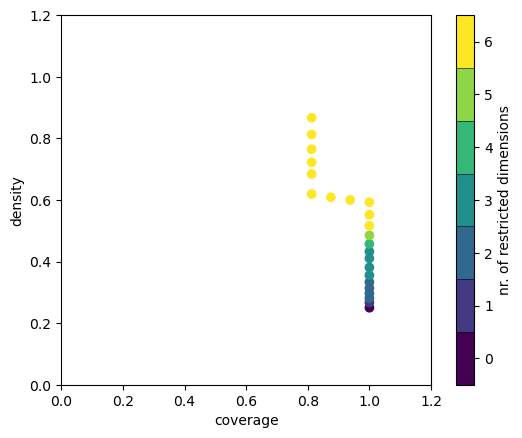

In [70]:
box1.show_tradeoff()

In [85]:
box_num = 22

coverage      0.8125
density     0.866667
id                22
mass        0.234375
mean        0.866667
res_dim            6
Name: 22, dtype: object

      box 22                                                       
         min       max                                    qp values
OA  1.002388  1.952685                  [-1.0, 0.44633117176152803]
CA  1.223492  1.885870  [0.049844891881003515, 0.31952633120745655]
WW  0.884918  1.990609                   [0.1021279689969454, -1.0]
HS  0.574865  0.968337    [0.1021279689969454, 0.27817644034519545]
LP  0.572502  0.978487   [0.44633117176152803, 0.27817644034519545]
SR  0.585263  0.975352   [0.44633117176152803, 0.44633117176152803]



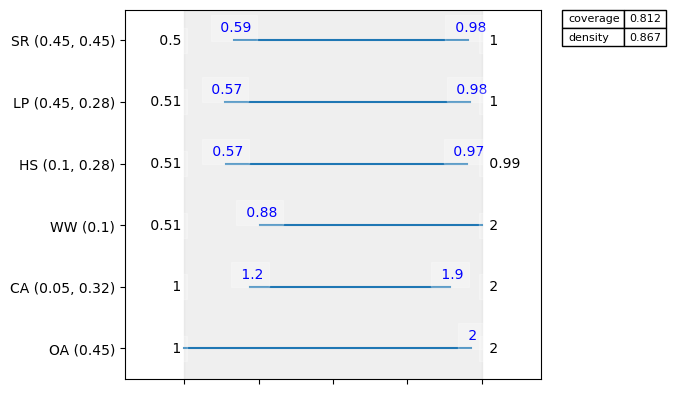

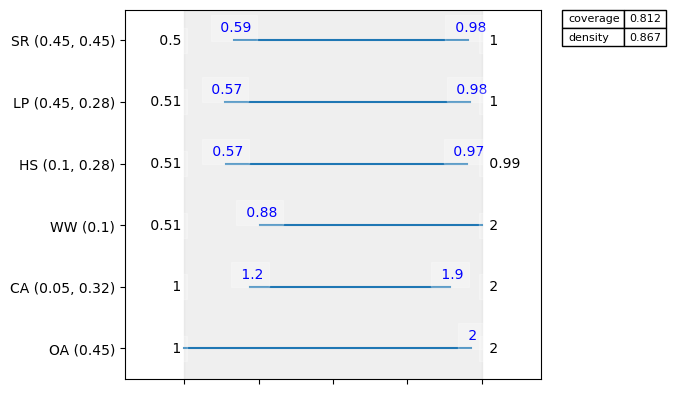

In [86]:
box1.inspect(box_num)
box1.inspect(box_num, style="graph")

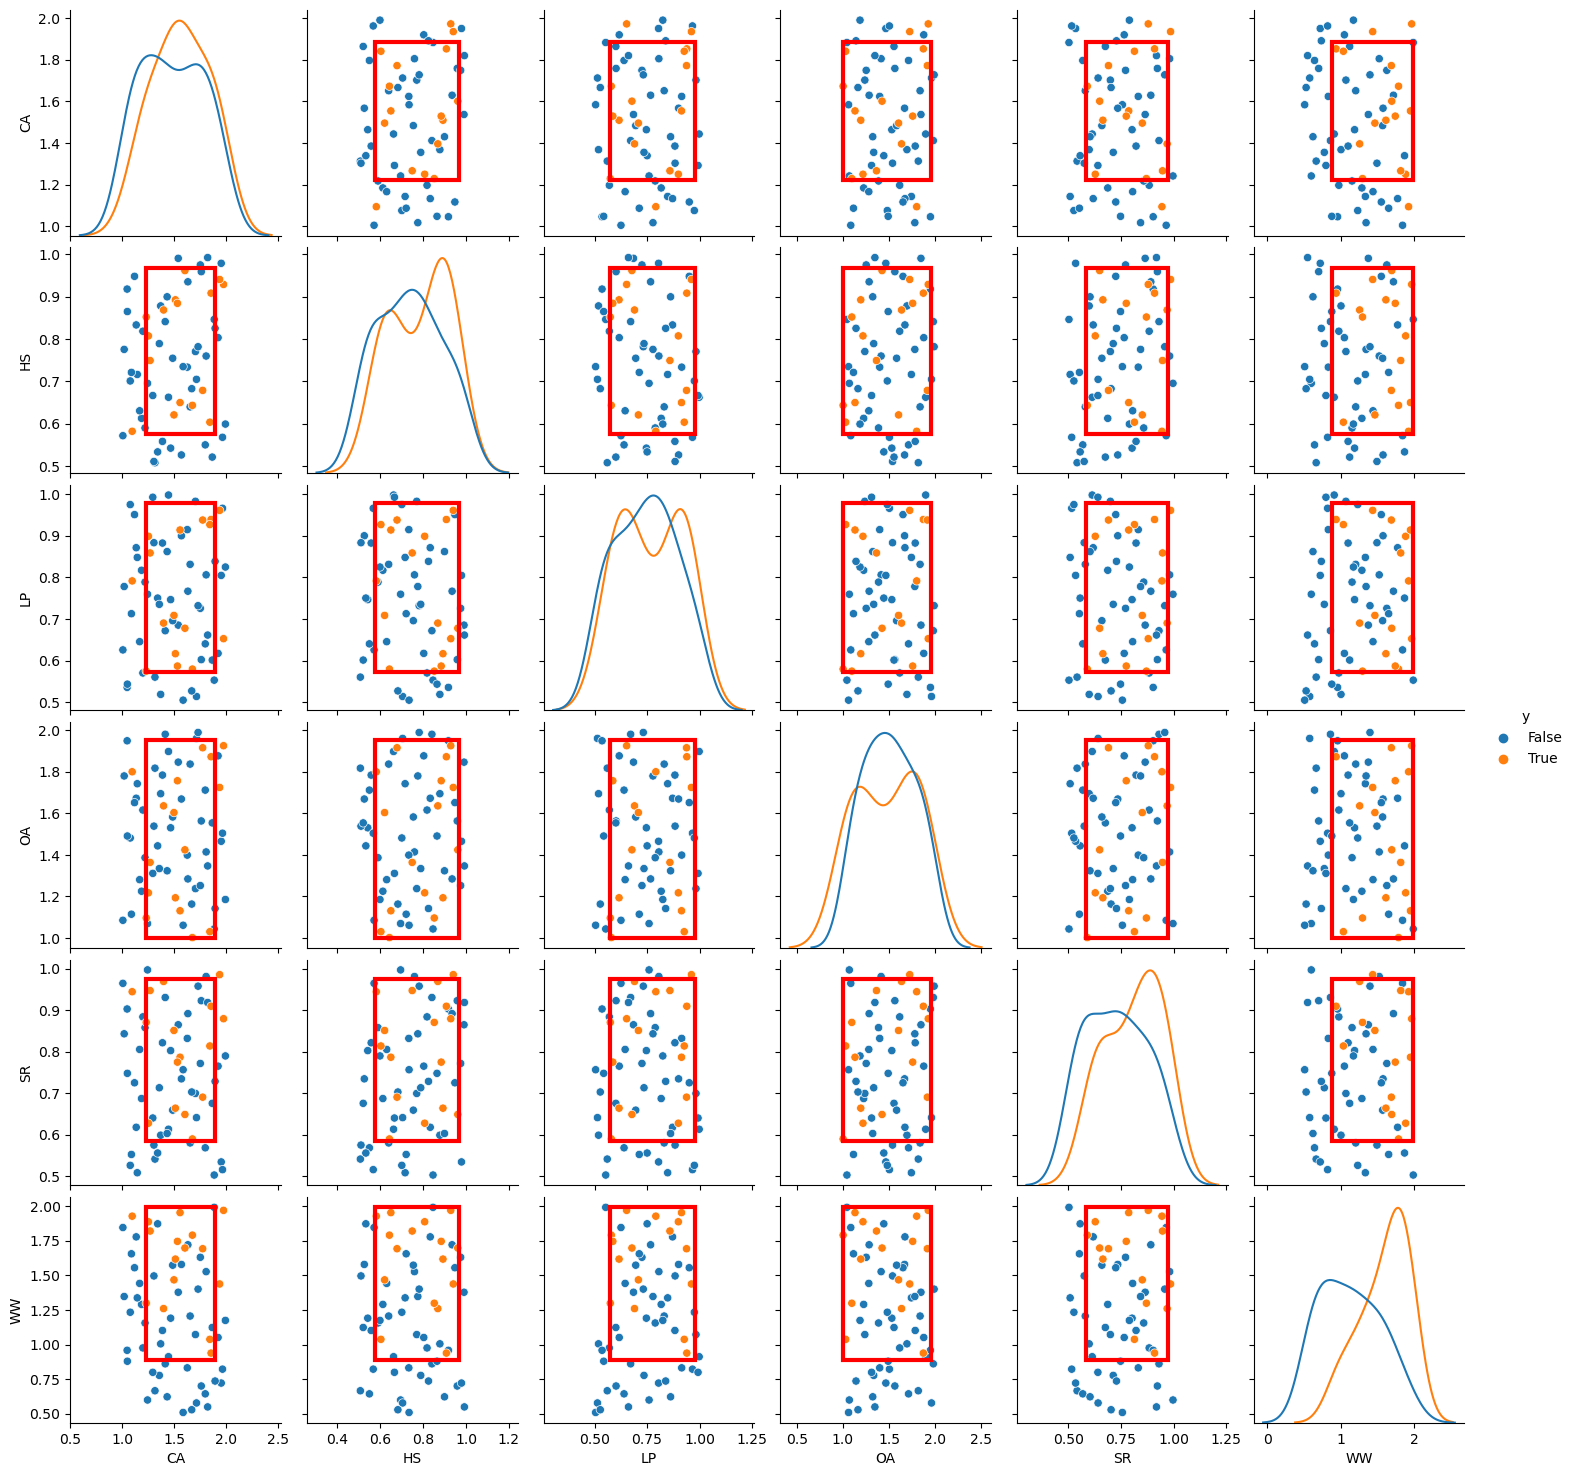

In [87]:
box1.show_pairs_scatter(box_num)

## Sobol indices -> werkt alleen als number of experiments = n^2

In [40]:
uncertainties = [
        RealParameter("CA", 1, 2),
        RealParameter("OA", 1, 2),
        RealParameter("LP", 0.5, 1),
        RealParameter("RP", 0.5, 2),
        RealParameter("WW", 0.5, 2),
        RealParameter("HS", 0.5, 1),
        RealParameter("SR", 0.5, 1),
        RealParameter("TA", 1, 2),
    ]

In [41]:
problem = get_SALib_problem(uncertainties)
Si = sobol.analyze(problem, outcomes["num_of_nodes"], calc_second_order=True, print_to_console=False)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.